# Лабораторная работа №1. Решение оптимизационных задач.

## Задача 1. Найти минимум функции одной переменной. Построить график функции.

### График заданной фукции : $$ f(x)=x^2-x-e^{-x},  x\in [0;2]$$

Для построения графиков одной функции на плоскости (х,у) в scilab можно использовать следующие функции:
***plot(x,y)*** - построение графика функции у(х). координаты точек (хбу) которого берутся из векторо одинакового размера х и у.

Приведем пример решения данной задачи с помощью scilab:

``` scilab
clf();
x = [0:0.1:2];
title("f(x) = x^2 - x+e^-x, x E [0;2]", "fontsize",3);
plot(x^2-x+%e^(-x));
```

На языке программирования python данная функция будет выглядеть следующим образом

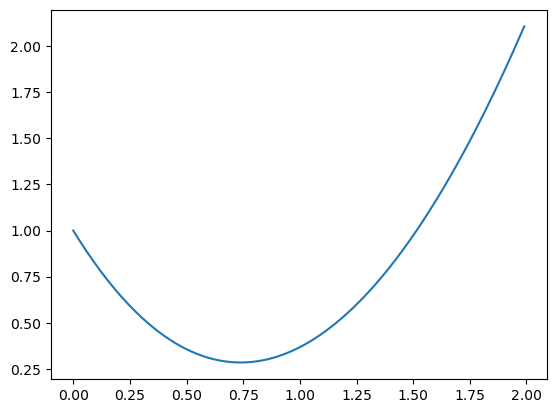

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2-x+math.exp(-x)

x = np.arange(0,2,0.01)
y = np.vectorize(f)

plt.plot(x,y(x))
plt.show()

Не обошлось без использования дополнительных библиотек, отвечающих за отображение графика и математические функции.

На графике видим что наименьшее значение функции достигается в точке х=0.75, f(x) = 0.26.

### Поиск минимального

Для  нахождения  минимума  функции на  заданном  промежутке  сначала исследуется  функция  на  наличие  минимума.  Выполняется  приближенная оценка точки минимума. Далее, для вычисления точки минимума с заданной высокой точностью в Scilab используется функция ***fminsearch:  xmin = fminsearch( f , x0)*** или ***[xmin, fval] = fminsearch( f , x0)  xmin*** – точка минимума функции, f – имя функции, x0 – начальное приближение, **fval*** – значение функции в точке минимума. Точность вычисления xmin по умолчанию 10^(-4). 

Мы будем выполнять данную задачу на python.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2-x+math.exp(-x)

x = np.arange(0,2,0.01)
y = np.vectorize(f)

ymin = np.min(y(x))
xmin = np.where(y(x) == ymin)
print('min x:',float(x[xmin[0]]),' f(x):',ymin)

min x: 0.74  f(x): 0.28471391552103437


Получили более точные значения


## Задача 2. Решить задачу линейного программирования.

### Задача $$W=x_1+x_2+3 \to max$$
$$
\left\{
\begin{aligned}
x_1-x_2 \le 1\\
x_1-x_2 \ge -2\\
-x_1+x_2 \ge -1\\
2x_1+x_2 \ge -2\\
\end{aligned}
\right.$$


Для решения задач линейного программирования в Scilab предназначена
функция linpro следующей структуры:
***[x,kl,f]=linpro(с,A,b[,ci,cs][,k][,x0])***

Здесь ***c*** — массив (вектор-столбец) коэффициентов при неизвестных функции цели, длина вектора n совпадает с количеством неизвестных x.

**A** — матрица при неизвестных из левой части системы ограничений, количество строк матрицы равно количеству ограничений m, а количество столбцов совпадает с количеством неизвестных n.

**b** — массив (вектор-столбец), содержит свободные члены системы ограничений, длина вектора m.

**ci** — массив (вектор-столбец) размерности n содержит нижнюю границу переменных (cij 6 xj ); если таковая отсутствует, указывают [].

**cs** — массив (вектор-столбец) длиной n, содержит верхнюю границу переменных (csj > xj ); если таковая отсутствует, указывают [].

**k** — целочисленная переменная, используется, если в систему ограничений кроме неравенств входят и равенства, в матрице они будут находиться в k первых
строках, оставшиеся l строк займут неравенства, т.е. m = k + l.

**x0** — вектор-столбец начальных приближений длиной n.

Функция ***linpro*** возвращает массив неизвестных x, минимальное значение функции f и массив множителей Лагранжа kl.

Пример кода на scilab.
``` scilab
c=[1;1];
A=[1 -1; -1 1; 1 -1; -2 -1];
b=[1;2;1;2];
ci=[0;0];
[x,kl,f]=linpro(p,A,b,ai,[])
```

Мы попробуем решить данную задачу на python

In [3]:
from ortools.linear_solver import pywraplp # библиотека линейного решателя
solver = pywraplp.Solver.CreateSolver("GLOP") # Создаем решатель с помощью бэкенда GLOP
x1 = solver.IntVar(0, solver.infinity(), 'x1') # Вводим переменные
x2 = solver.IntVar(0, solver.infinity(), 'x2')
solver.Add(x1- x2 <= 1) # Вводим ограничения
solver.Add(x1-x2 >= -2) 
solver.Add(-x1+x2 >= -1) 
solver.Add(2*x1+x2 >= -2)

solver.Maximize(x1 + x2 + 3) #поиск максимума целевой функции
status = solver.Solve() #оптимизация
if status == pywraplp.Solver.OPTIMAL: #Эта функция возвращает статус, который можно использовать, чтобы проверить оптимальность принятого решения.
    print(f'W = {solver.Objective().Value()}') # значения функции и х если решаема
    print('значения для х:')
    print(f' - x1 = {x1.solution_value()}')
    print(f' - x2 = {x2.solution_value()}')
else:
    print('Нет оптимального решения') #вывод ответа если решения нет

Нет оптимального решения


Как мы видим по итогу решения задачи оптимального решения при заданных ограничениях нет.